In [1]:
#Load the dataset using pandas and store it in a DataFrame, such as data.
import numpy as np
import pandas as pd
data=pd.read_csv("Tweets.csv")
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [2]:
#verifying the missing data
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [3]:
#Clean the dataset by removing rows with low confidence levels (airline_sentiment_confidence <= 0.65).
data = data.drop(data[data['airline_sentiment_confidence'] <= 0.65].index)
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [4]:
#Create a new column sentiment based on the airline_sentiment, where negative sentiment is encoded as 1 and non-negative sentiment as 0.
data['sentiment'] = data['airline_sentiment'].apply(lambda x: 1 if x == 'negative' else 0)

In [5]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito,1
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,1
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,0
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),1


In [6]:
#removing the parce from the text using beautifulsoup 
from bs4 import BeautifulSoup
import re
def clean_text(text):
    # Remove HTML tags using BeautifulSoup
    cleaned = BeautifulSoup(text, 'html.parser').get_text()
    # Remove special characters and non-alphanumeric characters
    cleaned = re.sub(r'[^a-zA-Z0-9\s]', ' ', cleaned)
    # Remove extra spaces and convert to lowercase
    cleaned = ' '.join(cleaned.split()).lower()
    return cleaned

In [7]:
#creating new column with the clean text
data['text_clean'] = data['text'].apply(clean_text)

C:\Users\ACER\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [8]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,text_clean
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0,virginamerica what dhepburn said
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0,virginamerica i didn t today must mean i need ...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1,virginamerica it s really aggressive to blast ...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1,virginamerica and it s a really big bad thing ...
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1,virginamerica seriously would pay 30 a flight ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito,1,americanair right on cue with the delays
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,1,americanair leaving over 20 minutes late fligh...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,0,americanair please bring american airlines to ...
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),1,americanair you have my money you change my fl...


In [9]:
#removing the previous column 'text' and 'airline_sentiment with new one'
data = data.drop(['airline_sentiment', 'text'], axis=1)

In [10]:
data

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,text_clean
0,570306133677760513,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0,virginamerica what dhepburn said
2,570301083672813571,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0,virginamerica i didn t today must mean i need ...
3,570301031407624196,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1,virginamerica it s really aggressive to blast ...
4,570300817074462722,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1,virginamerica and it s a really big bad thing ...
5,570300767074181121,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1,virginamerica seriously would pay 30 a flight ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,NaN,2015-02-22 12:01:02 -0800,NaN,Quito,1,americanair right on cue with the delays
14636,569587371693355008,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,1,americanair leaving over 20 minutes late fligh...
14637,569587242672398336,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,0,americanair please bring american airlines to ...
14638,569587188687634433,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),1,americanair you have my money you change my fl...


In [11]:
#clearing the NAN values
data.isnull().sum()

tweet_id                            0
airline_sentiment_confidence        0
negativereason                   4864
negativereason_confidence        3931
airline                             0
airline_sentiment_gold          13612
name                                0
negativereason_gold             13619
retweet_count                       0
tweet_coord                     12691
tweet_created                       0
tweet_location                   4406
user_timezone                    4514
sentiment                           0
text_clean                          0
dtype: int64

In [12]:
data['negativereason'].value_counts()

Customer Service Issue         2833
Late Flight                    1605
Can't Tell                     1103
Cancelled Flight                805
Lost Luggage                    696
Bad Flight                      553
Flight Booking Problems         484
Flight Attendant Complaints     467
longlines                       169
Damaged Luggage                  72
Name: negativereason, dtype: int64

In [13]:
data['negativereason_gold'].value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: negativereason_gold, dtype: int64

In [14]:
data['negativereason_gold'] = data['negativereason_gold'].fillna("Can't Tell")

In [15]:
data.isnull().sum()

tweet_id                            0
airline_sentiment_confidence        0
negativereason                   4864
negativereason_confidence        3931
airline                             0
airline_sentiment_gold          13612
name                                0
negativereason_gold                 0
retweet_count                       0
tweet_coord                     12691
tweet_created                       0
tweet_location                   4406
user_timezone                    4514
sentiment                           0
text_clean                          0
dtype: int64

In [16]:
data['airline_sentiment_gold'].value_counts()

negative    32
positive     4
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [17]:
data['airline_sentiment_gold'] = data['airline_sentiment_gold'].fillna("negative")

In [18]:
data

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,text_clean
0,570306133677760513,1.0000,NaN,NaN,Virgin America,negative,cairdin,Can't Tell,0,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0,virginamerica what dhepburn said
2,570301083672813571,0.6837,NaN,NaN,Virgin America,negative,yvonnalynn,Can't Tell,0,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0,virginamerica i didn t today must mean i need ...
3,570301031407624196,1.0000,Bad Flight,0.7033,Virgin America,negative,jnardino,Can't Tell,0,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1,virginamerica it s really aggressive to blast ...
4,570300817074462722,1.0000,Can't Tell,1.0000,Virgin America,negative,jnardino,Can't Tell,0,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1,virginamerica and it s a really big bad thing ...
5,570300767074181121,1.0000,Can't Tell,0.6842,Virgin America,negative,jnardino,Can't Tell,0,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1,virginamerica seriously would pay 30 a flight ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,0.6684,Late Flight,0.6684,American,negative,GolfWithWoody,Can't Tell,0,NaN,2015-02-22 12:01:02 -0800,NaN,Quito,1,americanair right on cue with the delays
14636,569587371693355008,1.0000,Customer Service Issue,1.0000,American,negative,itsropes,Can't Tell,0,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,1,americanair leaving over 20 minutes late fligh...
14637,569587242672398336,1.0000,NaN,NaN,American,negative,sanyabun,Can't Tell,0,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,0,americanair please bring american airlines to ...
14638,569587188687634433,1.0000,Customer Service Issue,0.6659,American,negative,SraJackson,Can't Tell,0,NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),1,americanair you have my money you change my fl...


In [19]:
data.isnull().sum()

tweet_id                            0
airline_sentiment_confidence        0
negativereason                   4864
negativereason_confidence        3931
airline                             0
airline_sentiment_gold              0
name                                0
negativereason_gold                 0
retweet_count                       0
tweet_coord                     12691
tweet_created                       0
tweet_location                   4406
user_timezone                    4514
sentiment                           0
text_clean                          0
dtype: int64

In [20]:
data['tweet_coord'].value_counts()

[0.0, 0.0]                      154
[40.64656067, -73.78334045]       6
[40.64646912, -73.79133606]       3
[32.91792297, -97.00367737]       3
[32.82813261, -97.25115941]       2
                               ... 
[45.58931882, -122.5959928]       1
[39.85861725, -104.67232956]      1
[39.85861339, -104.67232131]      1
[26.37852293, -81.78472152]       1
[40.64946781, -73.76624703]       1
Name: tweet_coord, Length: 784, dtype: int64

In [21]:
data['tweet_coord'] = data['tweet_coord'].fillna("[0.0, 0.0]")

In [22]:
data

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,text_clean
0,570306133677760513,1.0000,NaN,NaN,Virgin America,negative,cairdin,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0,virginamerica what dhepburn said
2,570301083672813571,0.6837,NaN,NaN,Virgin America,negative,yvonnalynn,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0,virginamerica i didn t today must mean i need ...
3,570301031407624196,1.0000,Bad Flight,0.7033,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1,virginamerica it s really aggressive to blast ...
4,570300817074462722,1.0000,Can't Tell,1.0000,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1,virginamerica and it s a really big bad thing ...
5,570300767074181121,1.0000,Can't Tell,0.6842,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1,virginamerica seriously would pay 30 a flight ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,0.6684,Late Flight,0.6684,American,negative,GolfWithWoody,Can't Tell,0,"[0.0, 0.0]",2015-02-22 12:01:02 -0800,NaN,Quito,1,americanair right on cue with the delays
14636,569587371693355008,1.0000,Customer Service Issue,1.0000,American,negative,itsropes,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:46 -0800,Texas,NaN,1,americanair leaving over 20 minutes late fligh...
14637,569587242672398336,1.0000,NaN,NaN,American,negative,sanyabun,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,0,americanair please bring american airlines to ...
14638,569587188687634433,1.0000,Customer Service Issue,0.6659,American,negative,SraJackson,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),1,americanair you have my money you change my fl...


In [23]:
data.isnull().sum()

tweet_id                           0
airline_sentiment_confidence       0
negativereason                  4864
negativereason_confidence       3931
airline                            0
airline_sentiment_gold             0
name                               0
negativereason_gold                0
retweet_count                      0
tweet_coord                        0
tweet_created                      0
tweet_location                  4406
user_timezone                   4514
sentiment                          0
text_clean                         0
dtype: int64

In [24]:
data['negativereason'].value_counts()

Customer Service Issue         2833
Late Flight                    1605
Can't Tell                     1103
Cancelled Flight                805
Lost Luggage                    696
Bad Flight                      553
Flight Booking Problems         484
Flight Attendant Complaints     467
longlines                       169
Damaged Luggage                  72
Name: negativereason, dtype: int64

In [25]:
data['negativereason'] = data['negativereason'].fillna("Can't Tell")

In [26]:
data.isnull().sum()

tweet_id                           0
airline_sentiment_confidence       0
negativereason                     0
negativereason_confidence       3931
airline                            0
airline_sentiment_gold             0
name                               0
negativereason_gold                0
retweet_count                      0
tweet_coord                        0
tweet_created                      0
tweet_location                  4406
user_timezone                   4514
sentiment                          0
text_clean                         0
dtype: int64

In [27]:
data['negativereason_confidence'].value_counts()

1.0000    3436
0.0000     933
0.6667      62
0.6632      33
0.6596      29
          ... 
0.3420       1
0.4039       1
0.3623       1
0.3278       1
0.7255       1
Name: negativereason_confidence, Length: 1317, dtype: int64

In [28]:
data["negativereason_confidence"] = pd.to_numeric(data["negativereason_confidence"], errors="coerce")
data["negativereason_confidence"].fillna(data["negativereason_confidence"].mean(), inplace=True)

In [29]:
data

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,text_clean
0,570306133677760513,1.0000,Can't Tell,0.672214,Virgin America,negative,cairdin,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0,virginamerica what dhepburn said
2,570301083672813571,0.6837,Can't Tell,0.672214,Virgin America,negative,yvonnalynn,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0,virginamerica i didn t today must mean i need ...
3,570301031407624196,1.0000,Bad Flight,0.703300,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),1,virginamerica it s really aggressive to blast ...
4,570300817074462722,1.0000,Can't Tell,1.000000,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),1,virginamerica and it s a really big bad thing ...
5,570300767074181121,1.0000,Can't Tell,0.684200,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),1,virginamerica seriously would pay 30 a flight ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,0.6684,Late Flight,0.668400,American,negative,GolfWithWoody,Can't Tell,0,"[0.0, 0.0]",2015-02-22 12:01:02 -0800,NaN,Quito,1,americanair right on cue with the delays
14636,569587371693355008,1.0000,Customer Service Issue,1.000000,American,negative,itsropes,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:46 -0800,Texas,NaN,1,americanair leaving over 20 minutes late fligh...
14637,569587242672398336,1.0000,Can't Tell,0.672214,American,negative,sanyabun,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,0,americanair please bring american airlines to ...
14638,569587188687634433,1.0000,Customer Service Issue,0.665900,American,negative,SraJackson,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),1,americanair you have my money you change my fl...


In [30]:
data["tweet_location"] = data["tweet_location"].fillna("Boston, MA")

In [31]:
data["user_timezone"].value_counts()

Eastern Time (US & Canada)    3464
Central Time (US & Canada)    1807
Pacific Time (US & Canada)    1109
Quito                          705
Atlantic Time (Canada)         458
                              ... 
Prague                           1
Bucharest                        1
Bern                             1
Irkutsk                          1
Perth                            1
Name: user_timezone, Length: 83, dtype: int64

In [32]:
data["user_timezone"] = data["user_timezone"].fillna("Eastern Time (US & Canada)")

In [33]:
data.isnull().sum()

tweet_id                        0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
sentiment                       0
text_clean                      0
dtype: int64

In [34]:
data

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,text_clean
0,570306133677760513,1.0000,Can't Tell,0.672214,Virgin America,negative,cairdin,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:35:52 -0800,"Boston, MA",Eastern Time (US & Canada),0,virginamerica what dhepburn said
2,570301083672813571,0.6837,Can't Tell,0.672214,Virgin America,negative,yvonnalynn,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0,virginamerica i didn t today must mean i need ...
3,570301031407624196,1.0000,Bad Flight,0.703300,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:15:36 -0800,"Boston, MA",Pacific Time (US & Canada),1,virginamerica it s really aggressive to blast ...
4,570300817074462722,1.0000,Can't Tell,1.000000,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:14:45 -0800,"Boston, MA",Pacific Time (US & Canada),1,virginamerica and it s a really big bad thing ...
5,570300767074181121,1.0000,Can't Tell,0.684200,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:14:33 -0800,"Boston, MA",Pacific Time (US & Canada),1,virginamerica seriously would pay 30 a flight ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,0.6684,Late Flight,0.668400,American,negative,GolfWithWoody,Can't Tell,0,"[0.0, 0.0]",2015-02-22 12:01:02 -0800,"Boston, MA",Quito,1,americanair right on cue with the delays
14636,569587371693355008,1.0000,Customer Service Issue,1.000000,American,negative,itsropes,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:46 -0800,Texas,Eastern Time (US & Canada),1,americanair leaving over 20 minutes late fligh...
14637,569587242672398336,1.0000,Can't Tell,0.672214,American,negative,sanyabun,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:15 -0800,"Nigeria,lagos",Eastern Time (US & Canada),0,americanair please bring american airlines to ...
14638,569587188687634433,1.0000,Customer Service Issue,0.665900,American,negative,SraJackson,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),1,americanair you have my money you change my fl...


In [35]:
data.isnull().sum()

tweet_id                        0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
sentiment                       0
text_clean                      0
dtype: int64

the feature it will be (airline_sentiment_confidence	negativereason	negativereason_confidence	airline	airline_sentiment_gold	negativereason_gold	retweet_count	tweet_location	user_timezone	text_clean)

In [36]:
data['tweet_coord'].value_counts()

[0.0, 0.0]                      12845
[40.64656067, -73.78334045]         6
[40.64646912, -73.79133606]         3
[32.91792297, -97.00367737]         3
[37.62006843, -122.38822083]        2
                                ...  
[37.61859126, -122.38385699]        1
[45.58931882, -122.5959928]         1
[39.85861725, -104.67232956]        1
[39.85861339, -104.67232131]        1
[40.64946781, -73.76624703]         1
Name: tweet_coord, Length: 784, dtype: int64

In [37]:
#we use corrolation between features and target to see if it exist
#import seaborn as sns
#grid = sns.FacetGrid(data, row="tweet_coord", col="sentiment", height=0.01, aspect=0.01)
#grid.map(sns.barplot, "tweet_coord", 'sentiment', alpha=.5, ci=None)
#grid.add_legend()


<Axes: xlabel='tweet_coord', ylabel='sentiment'>

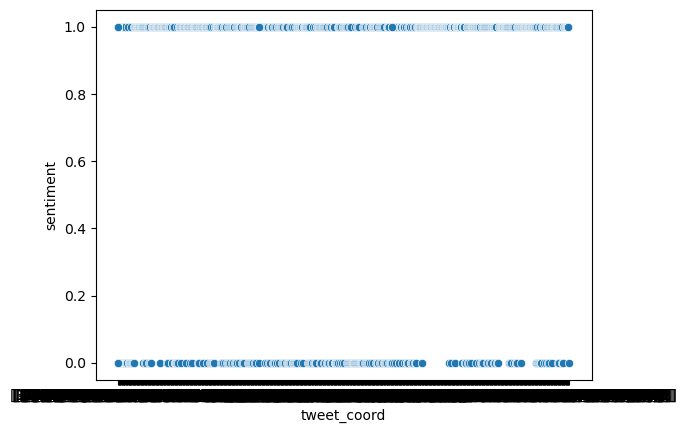

In [38]:
import seaborn as sns
sns.scatterplot(x="tweet_coord" , y="sentiment", data=data)

<Axes: xlabel='user_timezone', ylabel='sentiment'>

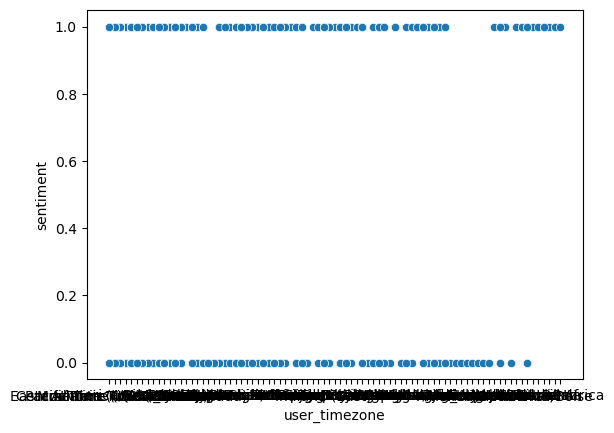

In [39]:
sns.scatterplot(x="user_timezone" , y="sentiment", data=data)

<Axes: xlabel='airline_sentiment_gold', ylabel='sentiment'>

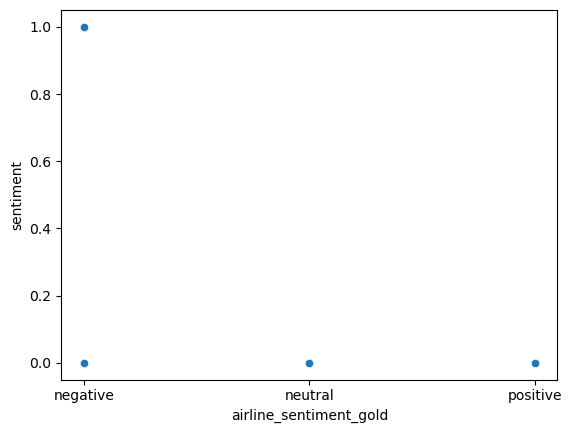

In [40]:
# we see a corrolation between the airline_sentiment_gold and the sentiment 
sns.scatterplot(x="airline_sentiment_gold" , y="sentiment", data=data)

In [41]:
data

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,text_clean
0,570306133677760513,1.0000,Can't Tell,0.672214,Virgin America,negative,cairdin,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:35:52 -0800,"Boston, MA",Eastern Time (US & Canada),0,virginamerica what dhepburn said
2,570301083672813571,0.6837,Can't Tell,0.672214,Virgin America,negative,yvonnalynn,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0,virginamerica i didn t today must mean i need ...
3,570301031407624196,1.0000,Bad Flight,0.703300,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:15:36 -0800,"Boston, MA",Pacific Time (US & Canada),1,virginamerica it s really aggressive to blast ...
4,570300817074462722,1.0000,Can't Tell,1.000000,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:14:45 -0800,"Boston, MA",Pacific Time (US & Canada),1,virginamerica and it s a really big bad thing ...
5,570300767074181121,1.0000,Can't Tell,0.684200,Virgin America,negative,jnardino,Can't Tell,0,"[0.0, 0.0]",2015-02-24 11:14:33 -0800,"Boston, MA",Pacific Time (US & Canada),1,virginamerica seriously would pay 30 a flight ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14634,569587691626622976,0.6684,Late Flight,0.668400,American,negative,GolfWithWoody,Can't Tell,0,"[0.0, 0.0]",2015-02-22 12:01:02 -0800,"Boston, MA",Quito,1,americanair right on cue with the delays
14636,569587371693355008,1.0000,Customer Service Issue,1.000000,American,negative,itsropes,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:46 -0800,Texas,Eastern Time (US & Canada),1,americanair leaving over 20 minutes late fligh...
14637,569587242672398336,1.0000,Can't Tell,0.672214,American,negative,sanyabun,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:15 -0800,"Nigeria,lagos",Eastern Time (US & Canada),0,americanair please bring american airlines to ...
14638,569587188687634433,1.0000,Customer Service Issue,0.665900,American,negative,SraJackson,Can't Tell,0,"[0.0, 0.0]",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),1,americanair you have my money you change my fl...


In [72]:
# gonna try to split and  
from sklearn.model_selection import train_test_split
x=data[["negativereason_confidence","airline","airline_sentiment_gold","negativereason_gold","retweet_count","tweet_location","user_timezone","text_clean"]].values
y=data["sentiment"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1) #splitting data with test size of 20%



In [43]:
#Extract the text features (X) from the training and testing data, and the corresponding sentiment labels (y).
x_train_text = x_train[:, -1]  
x_test_text = x_test[:, -1]    

# Extracting sentiment labels (y) from training and testing data
y_train_sentiment = y_train
y_test_sentiment = y_test

In [44]:
# define function tokenization and stemming
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
def tokenize_and_stem(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Initialize a stemmer
    stemmer = PorterStemmer()
    
    # Initialize a set of stopwords and punctuation characters
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    
    # Initialize a list to store the processed tokens
    processed_tokens = []
    
   


        
        # Remove punctuation and stop words
        if token not in punctuation and token not in stop_words:
            # Stem the token
            stemmed_token = stemmer.stem(token)
            processed_tokens.append(stemmed_token)
    
    return processed_tokens


In [75]:
#set of set world using NLTK
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
stopwords_set = stopwords.words('english')
print(stopwords_set)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
#using initialize_count_vectorizer
from sklearn.feature_extraction.text import CountVectorizer

def initialize_count_vectorizer(tokenizer_function, stopwords_list):
    vectorizer = CountVectorizer(
        analyzer='word',
        tokenizer=tokenizer_function,
        lowercase=True,
        ngram_range=(1, 1),
        stop_words=stopwords_list
    )
    return vectorizer

# Sample data containing preprocessed text
'''preprocessed_text = [
    "love run park",
    "anoth sentenc",
    "text",
    "text"
]
'''

# Initialize the CountVectorizer using the custom function
vectorizer = initialize_count_vectorizer(tokenize_and_stem, stopwords_set)

# Fit and transform the preprocessed text
x_train_vecorizer= vectorizer.fit_transform(x_train_text)

# Print the vocabulary (feature names)
print(vectorizer.get_feature_names_out())








C:\Users\ACER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


['0' '00' '000' ... 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']


In [77]:
from sklearn.model_selection import StratifiedKFold
num_splits = 5
stratified_kfold = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=1)


In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
# Sample data and labels (replace these with your actual data)





# Initialize the SVM classifier
svm_classifier = SVC(
    probability=True,   # Calculate class probabilities
    kernel="linear",    # Linear kernel
    class_weight="balanced"  # Adjust class weights for imbalanced data
)

# Build the pipeline
pipeline = Pipeline([
    ("vectorizer", vectorizer),
    ("svm", svm_classifier)
])

# Fit the pipeline on the training data
pipeline.fit(x_train_text, y_train)

# Predict on the testing data
y_pred = pipeline.predict(x_test_text)

# Print classification report
print(classification_report(y_test, y_pred))



C:\Users\ACER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.71      0.83      0.76       913
           1       0.91      0.83      0.86      1818

    accuracy                           0.83      2731
   macro avg       0.81      0.83      0.81      2731
weighted avg       0.84      0.83      0.83      2731



'\nbest_estimator = pipeline  \n\n# Use the best estimator to report performance metrics on the testing data\nreport_results(best_estimator, x_test, y_test)\nbest_estimator1 = pipeline  # Replace with your best estimator\n\n# Use the best estimator to plot the ROC curve on the testing data\nget_roc_curve(best_estimator1, x_test, y_test)\n# Make predictions using the best estimator\npredictions = best_estimator.predict(data)'

In [81]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

def report_results(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)
    y_prob = estimator.predict_proba(X_test)[:, 1]  # Probability of positive class for AUC

    auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("AUC:", auc)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)



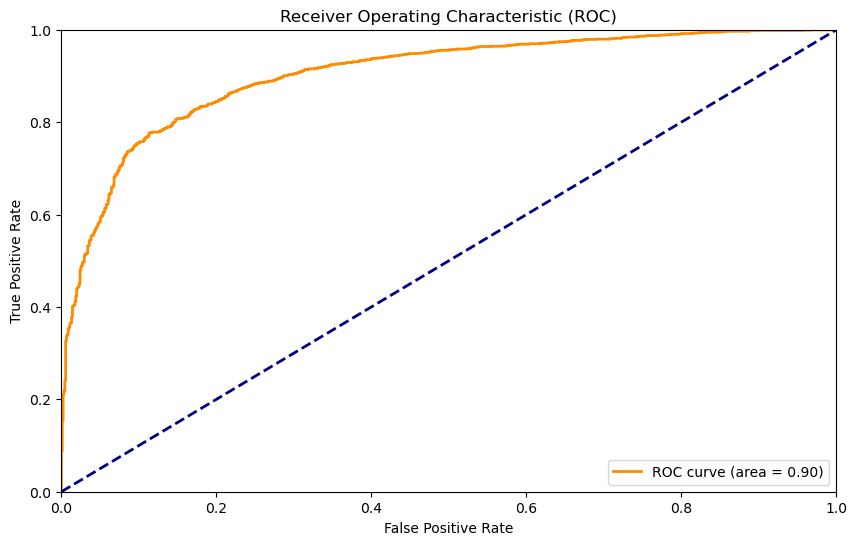

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
   
def get_roc_curve(estimator, X_test, y_test):
    y_prob = estimator.predict_proba(X_test)[:, 1]  # Probability of positive class for ROC
    fpr, tpr,_= roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
get_roc_curve(pipeline,x_test_text,y_test)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
# Sample data and labels (replace these with your actual data)
x=data["text_clean"]
y =data["sentiment"]     # Target labels

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
#set number seed 1
np.random.seed(1)


# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Predict on the testing data
y_pred = pipeline.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Assuming you have already trained and tuned your pipeline
best_estimator = pipeline  # Replace with your best estimator

# Use the best estimator to report performance metrics on the testing data
report_results(best_estimator, x_test, y_test)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.71      0.83      0.76       913
           1       0.91      0.83      0.86      1818

    accuracy                           0.83      2731
   macro avg       0.81      0.83      0.81      2731
weighted avg       0.84      0.83      0.83      2731

AUC: 0.903446368733259
Accuracy: 0.8279018674478213
F1 Score: 0.8649425287356323
Precision: 0.9055354993983152
Recall: 0.8278327832783279


In [84]:
pred=['it was a bad experience']

In [86]:
y_pred = pipeline.predict(pred)
y_pred

array([1], dtype=int64)

In [87]:
pred=['it was a good experience']
y_pred = pipeline.predict(pred)
y_pred

array([0], dtype=int64)